In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

# settings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objs as go
import plotly.express as px
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [3]:
Prison_county=pd.read_csv('prison_county_df.csv')
Prison_county.head()

,Unnamed: 0,countystate,date,cases,prison_county,frac_released,diff_cases,prison_pop,prison_capacity,prison_fullness,...,age_35to44_perc,age_45to54_perc,age_55to64_perc,age_65to74_perc,age_75to84_perc,age_84plus_perc,lowrisk_agegroup_perc,highrisk_agegroup_perc,land_area,population_density
0,1,"abbeville, South Carolina",2020-04-07,5,0,NaN,1,NaN,NaN,NaN,...,0.103663,0.130598,0.146041,0.128357,0.065279,0.024082,0.782283,0.217717,490.48,50.03466
1,2,"abbeville, South Carolina",2020-04-06,6,0,NaN,3,NaN,NaN,NaN,...,0.103663,0.130598,0.146041,0.128357,0.065279,0.024082,0.782283,0.217717,490.48,50.03466
2,3,"abbeville, South Carolina",2020-04-09,7,0,NaN,1,NaN,NaN,NaN,...,0.103663,0.130598,0.146041,0.128357,0.065279,0.024082,0.782283,0.217717,490.48,50.03466
3,4,"abbeville, South Carolina",2020-04-08,6,0,NaN,2,NaN,NaN,NaN,...,0.103663,0.130598,0.146041,0.128357,0.065279,0.024082,0.782283,0.217717,490.48,50.03466
4,5,"abbeville, South Carolina",2020-04-03,6,0,NaN,2,NaN,NaN,NaN,...,0.103663,0.130598,0.146041,0.128357,0.065279,0.024082,0.782283,0.217717,490.48,50.03466


In [20]:
Prison_county1=Prison_county[['date', 'cases','county', 'state']]
Prison_county1.shape

(115189, 4)

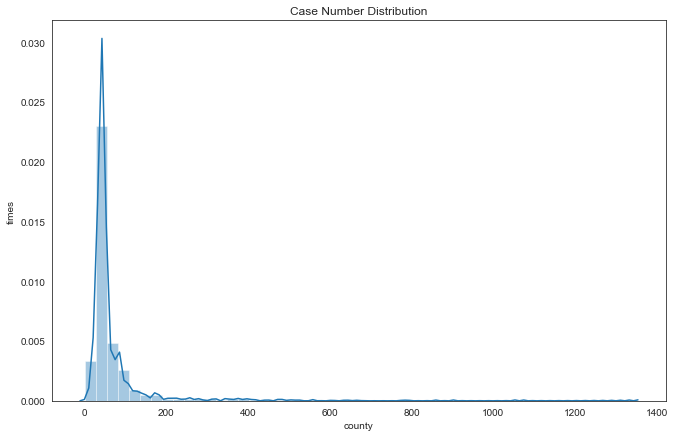

In [15]:
count=Prison_county1.groupby(['county'])['county'].count()
sns.set_style('white')
plt.figure(figsize=(11, 7))
sns.distplot(count)
plt.xlabel('county')
plt.ylabel('times')
plt.title('Case Number Distribution')
plt.show()

In [19]:
Prison_county1['state'].unique()

array(['South Carolina', 'Louisiana', 'Virginia', 'Idaho', 'Iowa',
       'Kentucky', 'Missouri', 'Oklahoma', 'Colorado', 'Illinois',
       'Indiana', 'Mississippi', 'Nebraska', 'Ohio', 'Pennsylvania',
       'Washington', 'Wisconsin', 'Vermont', 'Minnesota', 'Florida',
       'North Carolina', 'California', 'New York', 'Wyoming', 'Michigan',
       nan, 'Maryland', 'Alaska', 'Tennessee', 'Texas', 'Maine',
       'Arizona', 'Georgia', 'Arkansas', 'Kansas', 'New Jersey',
       'South Dakota', 'Alabama', 'West Virginia', 'North Dakota',
       'Massachusetts', 'Montana', 'New Hampshire', 'Oregon',
       'New Mexico', 'Utah', 'Rhode Island', 'Nevada', 'Connecticut',
       'Hawaii', 'Delaware'], dtype=object)

In [52]:
Texas=Prison_county1.loc[Prison_county1['state']=='Texas']
Texas=Texas[['date','cases']]
Texas

,date,cases
2367,2020-04-24,16
2368,2020-04-22,14
2369,2020-04-28,23
2370,2020-04-13,3
2371,2020-04-21,10
...,...,...
115184,2020-05-07,1
115185,2020-05-08,1
115186,2020-05-09,2
115187,2020-05-10,2


In [53]:
Texas.set_index(['date'], inplace = True) 
Texas.index=pd.to_datetime(Texas.index)

In [54]:
data=Texas.resample('D').first().fillna(0)
# data=data[:20]
x=np.arange(len(data)).reshape(-1,1)
y=data.values

In [55]:
data1=pd.DataFrame(data)
data1

,cases
date,
2020-03-01,11
2020-03-02,11
2020-03-03,11
2020-03-04,11
2020-03-05,11
...,...
2020-05-07,40
2020-05-08,41
2020-05-09,41


In [56]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)

In [57]:
test = np.arange(len(data)+30).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

In [58]:
predicted_count

2020-03-01     1
2020-03-02     1
2020-03-03     1
2020-03-04     1
2020-03-05     2
              ..
2020-06-06    39
2020-06-07    39
2020-06-08    40
2020-06-09    40
2020-06-10    40
Length: 102, dtype: int64

In [64]:
pd.plotting.register_matplotlib_converters()

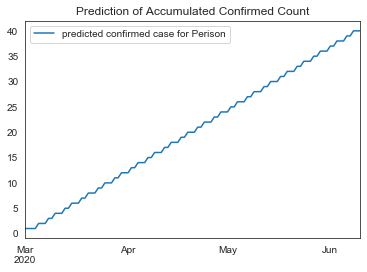

In [67]:
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend([ 'predicted confirmed case for Perison'])
plt.show()

In [68]:
prophet= pd.DataFrame(data)
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data

,ds,y
0,2020-03-01,11
1,2020-03-02,11
2,2020-03-03,11
3,2020-03-04,11
4,2020-03-05,11
...,...,...
67,2020-05-07,40
68,2020-05-08,41
69,2020-05-09,41
70,2020-05-10,41


In [69]:
model=Prophet()
model.fit(pr_data)
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)
forecast.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
97,2020-06-06,33.605571,21.719643,43.760108,33.599363,33.611396,-0.810890,-0.810890,-0.810890,-0.810890,-0.810890,-0.810890,0.0,0.0,0.0,32.794681
98,2020-06-07,33.916596,22.015514,45.719086,33.909962,33.922737,0.116143,0.116143,0.116143,0.116143,0.116143,0.116143,0.0,0.0,0.0,34.032739
99,2020-06-08,34.227621,23.430331,45.523794,34.220626,34.234057,0.442536,0.442536,0.442536,0.442536,0.442536,0.442536,0.0,0.0,0.0,34.670157
100,2020-06-09,34.538645,23.055399,45.313184,34.531140,34.545498,-0.571953,-0.571953,-0.571953,-0.571953,-0.571953,-0.571953,0.0,0.0,0.0,33.966692
101,2020-06-10,34.849670,22.734353,45.552092,34.841872,34.856857,-0.681627,-0.681627,-0.681627,-0.681627,-0.681627,-0.681627,0.0,0.0,0.0,34.168043


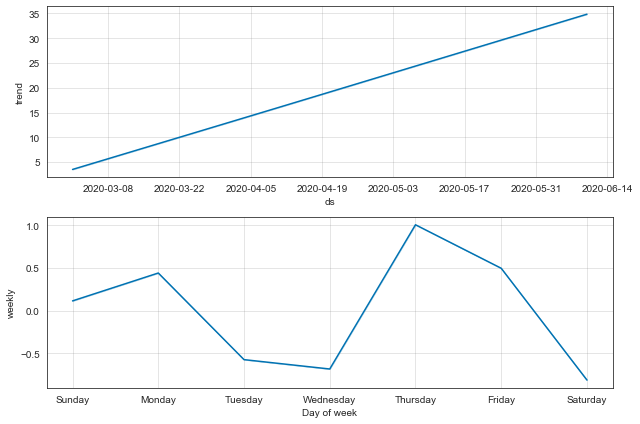

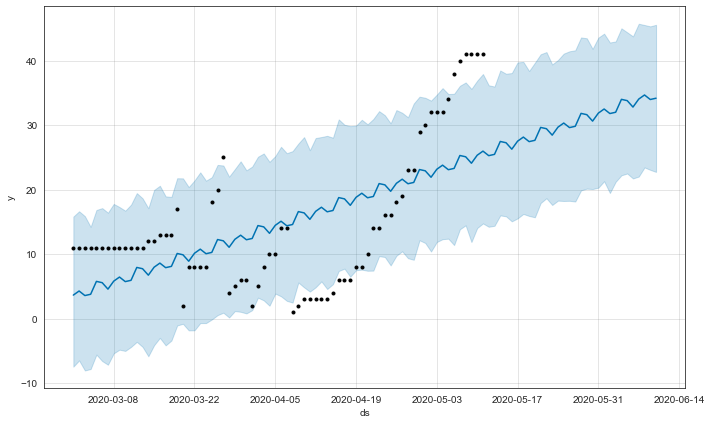

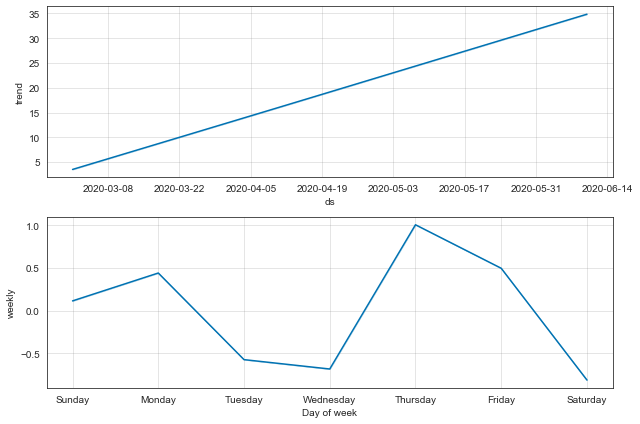

In [70]:
model.plot(forecast)
model.plot_components(forecast)

In [73]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
error = mean_absolute_percentage_error(Texas[-102*1:].values,
                                       forecast.yhat[-102*1:].values)
print(error)

739.1285637894053


In [75]:
Texas=Texas.reset_index()

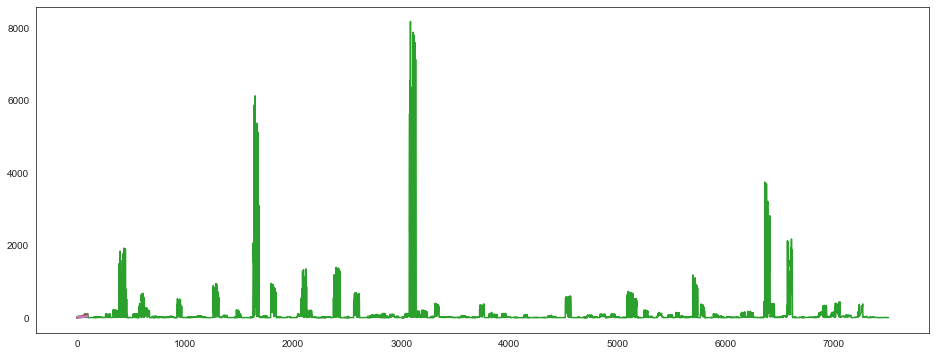

In [76]:
plt.figure(figsize = (16,6))
plt.plot(forecast.yhat[-288*1:].reset_index())
plt.plot(Texas['cases'])
plt.plot(forecast.yhat_lower[-288*1:].reset_index())
plt.plot(forecast.yhat_upper[-288*1:].reset_index())

In [95]:
Michi=Prison_county1.loc[Prison_county1['state']=='Michigan']
Michi=Michi[['date','cases']]
Michi

,date,cases
1246,2020-05-01,4
1247,2020-05-04,4
1248,2020-04-29,4
1249,2020-05-03,4
1250,2020-05-02,5
...,...,...
110953,2020-05-09,10
110954,2020-05-06,9
110955,2020-03-28,1
110956,2020-05-08,10


In [96]:
Michi.set_index(['date'], inplace = True) 
Michi.index=pd.to_datetime(Michi.index)

In [97]:
data=Michi.resample('D').first().fillna(0)
# data=data[:20]
x=np.arange(len(data)).reshape(-1,1)
y=data.values

In [98]:
data1=pd.DataFrame(data)
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)

In [99]:
test = np.arange(len(data)+30).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

In [100]:
predicted_count

2020-03-17    16
2020-03-18    23
2020-03-19     7
2020-03-20     1
2020-03-21     1
              ..
2020-06-06   -25
2020-06-07   -26
2020-06-08   -27
2020-06-09   -28
2020-06-10   -30
Length: 86, dtype: int64

In [101]:
pd.plotting.register_matplotlib_converters()

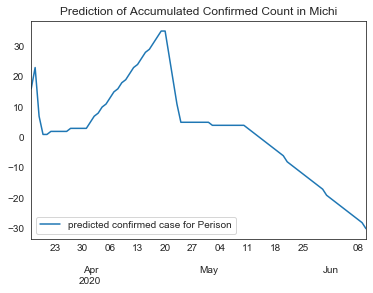

In [102]:
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count in Michi')
plt.legend([ 'predicted confirmed case for Perison'])
plt.show()

In [118]:
prophet= pd.DataFrame(data)
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data.head()

,ds,y
0,2020-03-17,16
1,2020-03-18,23
2,2020-03-19,7
3,2020-03-20,1
4,2020-03-21,1


In [119]:
model=Prophet()
model.fit(pr_data)
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)
forecast.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
81,2020-06-06,11.119189,-4.749337,25.967709,11.117549,11.120957,-1.129078,-1.129078,-1.129078,-1.129078,-1.129078,-1.129078,0.0,0.0,0.0,9.990111
82,2020-06-07,11.123602,-1.680157,25.283002,11.121858,11.125462,0.491530,0.491530,0.491530,0.491530,0.491530,0.491530,0.0,0.0,0.0,11.615132
83,2020-06-08,11.128014,-1.820433,26.533607,11.126193,11.130014,0.987342,0.987342,0.987342,0.987342,0.987342,0.987342,0.0,0.0,0.0,12.115356
84,2020-06-09,11.132427,1.105838,29.641801,11.130502,11.134516,3.762156,3.762156,3.762156,3.762156,3.762156,3.762156,0.0,0.0,0.0,14.894583
85,2020-06-10,11.136839,-4.544780,25.074115,11.134829,11.139030,-0.116597,-0.116597,-0.116597,-0.116597,-0.116597,-0.116597,0.0,0.0,0.0,11.020242


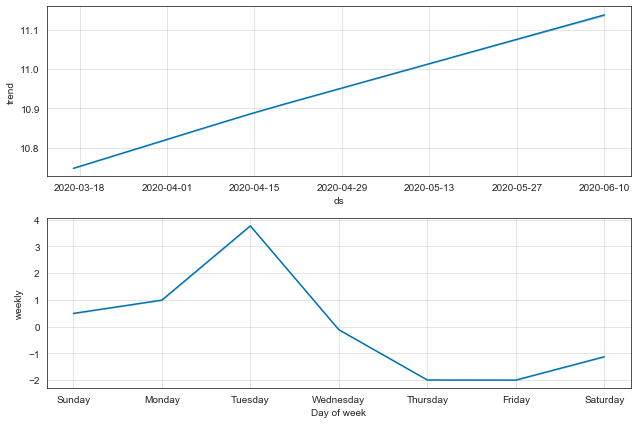

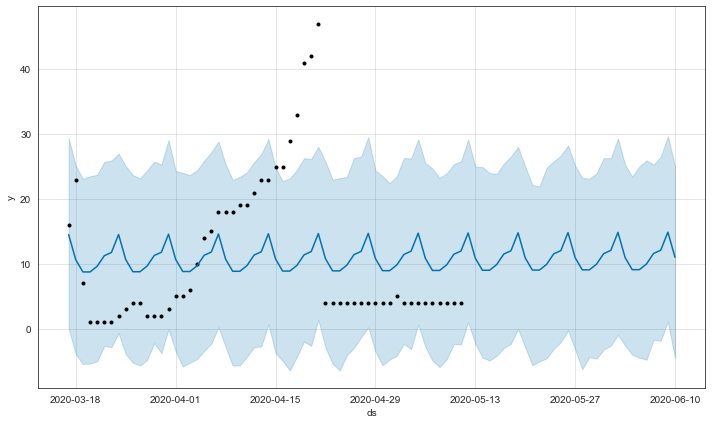

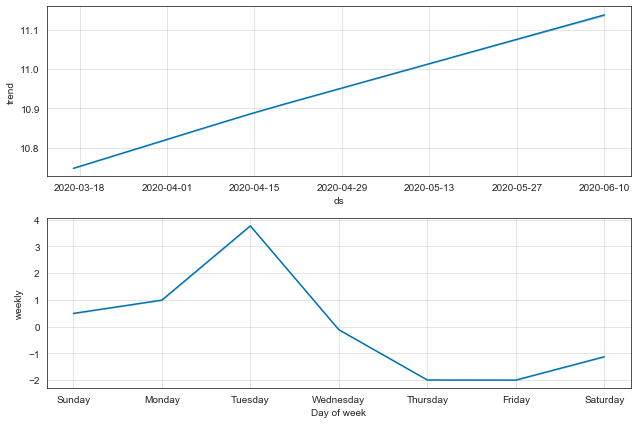

In [120]:
model.plot(forecast)
model.plot_components(forecast)

In [23]:
Cali=Prison_county1.loc[Prison_county1['state']=='California']
Cali

,date,cases,county,state
1002,2020-05-07,1938,Alameda,California
1003,2020-04-21,1260,Alameda,California
1004,2020-04-01,380,Alameda,California
1005,2020-03-29,291,Alameda,California
1006,2020-03-30,304,Alameda,California
...,...,...,...,...
115010,2020-04-30,18,Yuba,California
115011,2020-05-01,19,Yuba,California
115012,2020-05-02,19,Yuba,California
115013,2020-05-03,19,Yuba,California


In [77]:
Cali=Prison_county1.loc[Prison_county1['state']=='California']
Cali=Cali[['date','cases']]
Cali

,date,cases
1002,2020-05-07,1938
1003,2020-04-21,1260
1004,2020-04-01,380
1005,2020-03-29,291
1006,2020-03-30,304
...,...,...
115010,2020-04-30,18
115011,2020-05-01,19
115012,2020-05-02,19
115013,2020-05-03,19


In [78]:
Cali.set_index(['date'], inplace = True) 
Cali.index=pd.to_datetime(Cali.index)

In [79]:
data=Cali.resample('D').first().fillna(0)
# data=data[:20]
x=np.arange(len(data)).reshape(-1,1)
y=data.values

In [80]:
data1=pd.DataFrame(data)
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)

In [81]:
test = np.arange(len(data)+30).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

In [82]:
predicted_count

2020-03-01       0
2020-03-02       0
2020-03-03       0
2020-03-04       0
2020-03-05       0
              ... 
2020-06-06    3096
2020-06-07    3133
2020-06-08    3171
2020-06-09    3209
2020-06-10    3246
Length: 102, dtype: int64

In [83]:
pd.plotting.register_matplotlib_converters()

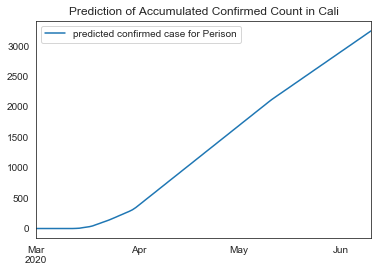

In [85]:
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count in Cali')
plt.legend([ 'predicted confirmed case for Perison'])
plt.show()

In [86]:
prophet= pd.DataFrame(data)
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data

,ds,y
0,2020-03-01,1
1,2020-03-02,1
2,2020-03-03,1
3,2020-03-04,1
4,2020-03-05,1
...,...,...
67,2020-05-07,1938
68,2020-05-08,1982
69,2020-05-09,2044
70,2020-05-10,2085


In [87]:
model=Prophet()
model.fit(pr_data)
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)
forecast.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
97,2020-06-06,3208.760368,3073.673923,3340.093000,3074.774888,3339.324958,2.843756,2.843756,2.843756,2.843756,2.843756,2.843756,0.0,0.0,0.0,3211.604124
98,2020-06-07,3251.100956,3117.378878,3397.532459,3109.133062,3389.132961,9.909744,9.909744,9.909744,9.909744,9.909744,9.909744,0.0,0.0,0.0,3261.010700
99,2020-06-08,3293.441545,3137.211196,3446.996268,3146.353559,3441.244248,1.838753,1.838753,1.838753,1.838753,1.838753,1.838753,0.0,0.0,0.0,3295.280297
100,2020-06-09,3335.782133,3171.682458,3482.845891,3178.981938,3494.895448,-6.272866,-6.272866,-6.272866,-6.272866,-6.272866,-6.272866,0.0,0.0,0.0,3329.509267
101,2020-06-10,3378.122721,3203.655550,3529.816637,3212.674817,3540.699310,-8.761572,-8.761572,-8.761572,-8.761572,-8.761572,-8.761572,0.0,0.0,0.0,3369.361150


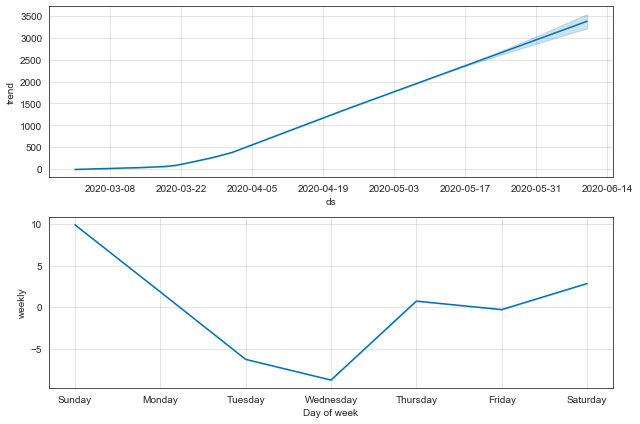

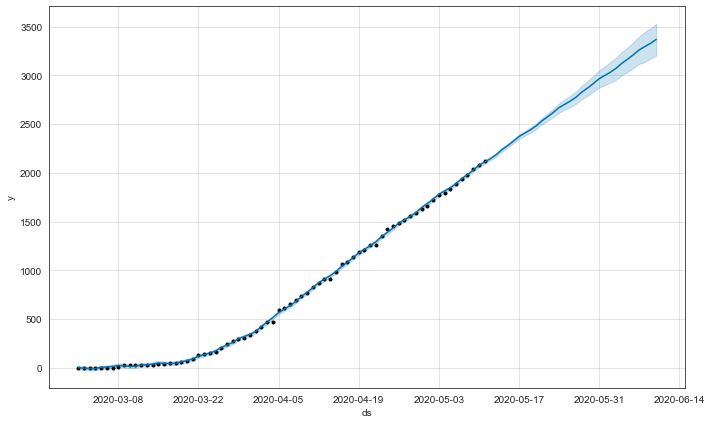

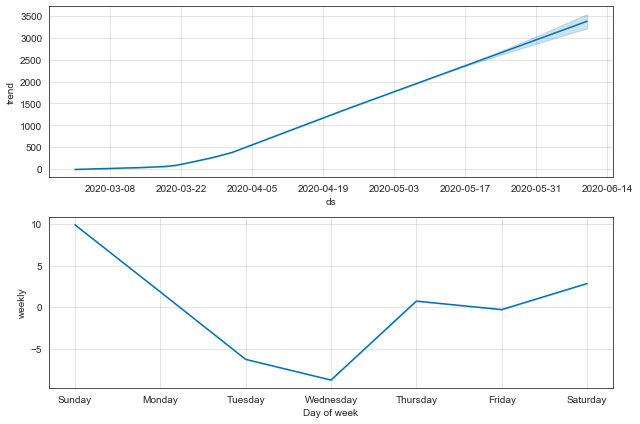

In [88]:
model.plot(forecast)
model.plot_components(forecast)

In [90]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
error = mean_absolute_percentage_error(Cali[-102*1:].values,
                                       forecast.yhat[-102*1:].values)
print(error)

9766.784915114302


In [94]:
# plt.figure(figsize = (16,6))
# plt.plot(forecast.yhat[-288*1:].reset_index())
# plt.plot(Cali['cases'])
# plt.plot(forecast.yhat_lower[-288*1:].reset_index())
# plt.plot(forecast.yhat_upper[-288*1:].reset_index())